`nltk` is the most popular Python package for Natural Language processing, it provides algorithms for importing, cleaning, pre-processing text data in human language and then apply computational linguistics algorithms like sentiment analysis.

In [55]:
import nltk
import re
from nltk.corpus import words
from collections import Counter
import string
%matplotlib inline
import matplotlib.pyplot as plt

## Preparing the dataset

### Download a dataset available in `nltk`

`nltk` includes many easy-to-use datasets in the nltk.corpus package, we can download for example the gutenberg package, which contains some 25,000 free electronic books, hosted at http://www.gutenberg.org/, using the nltk.download function:

In [2]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /Users/sahar/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

To see the list of all datasets available for download, you can call:

In [3]:
#nltk.download_gui()

Once the data have been downloaded, we can import them from `nltk.corpus`

In [4]:
from nltk.corpus import gutenberg

The fileids method provided by all the datasets in nltk.corpus gives access to a list of all the files available.

In [5]:
gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

In [6]:
corpus_name = gutenberg.fileids()[2]
blacklist_words = ['chapter'] #words to be removed from analysis
print corpus_name
print 'Words to be removed:', blacklist_words

austen-sense.txt
Words to be removed: ['chapter']


In [7]:
corpus_text = gutenberg.raw(fileids=corpus_name)

In [8]:
corpus_text[:100]

u'[Sense and Sensibility by Jane Austen 1811]\n\nCHAPTER 1\n\n\nThe family of Dashwood had long been settle'

### Or, read the dataset stored on your computer

In [9]:
# The method readlines() reads until EOF using readline() and returns a list containing the lines. 
# The method readline() reads a single line
# The method read() reads the entire file
with open('austen-sense.txt') as f:
    #textlines = f.readlines()
    #singleline = f.readline()
    text = f.read()

In [10]:
#textlines[:6]

In [11]:
#singleline

In [12]:
text[:100]

'[Sense and Sensibility by Jane Austen 1811]\n\nCHAPTER 1\n\n\nThe family of Dashwood had long been settle'

## Preprocess the dataset

### Change to lower case

In [13]:
corpus_text_lw = corpus_text.lower()
corpus_text_lw[:100]

u'[sense and sensibility by jane austen 1811]\n\nchapter 1\n\n\nthe family of dashwood had long been settle'

### Remove numeric elements

In [14]:
corpus_text_nonNumeric = re.sub(r'\d+', '', corpus_text_lw)
corpus_text_nonNumeric[:100]

u'[sense and sensibility by jane austen ]\n\nchapter \n\n\nthe family of dashwood had long been settled in '

### Remove punctuations

In [15]:
corpus_text_noPunc = re.sub(r'[^\w]',' ',corpus_text_nonNumeric)
corpus_text_noPunc[:150]

u' sense and sensibility by jane austen    chapter    the family of dashwood had long been settled in sussex  their estate was large  and their residenc'

I also tried removing punctuations after tokenizing corpus to words using: 
`puncs = string.punctuation`

However, I did not find it efficient, as the tokenizer was not separating well punctuations. Thus, I decided to remove punctuations using regular expressions.

### Collapse multiple spaces

In [16]:
corpus_text_collapseWspace = re.sub(r'\s+', ' ', corpus_text_noPunc)
corpus_text_collapseWspace[:100]

u' sense and sensibility by jane austen chapter the family of dashwood had long been settled in sussex'

### Trim leading and trailing spaces

In [17]:
corpus_text_trimmed = corpus_text_collapseWspace.strip()
corpus_text_trimmed[:150]

u'sense and sensibility by jane austen chapter the family of dashwood had long been settled in sussex their estate was large and their residence was at '

### Tokenize text in words

**Separate words and punctuations of the dataset which was downloaded from `nltk`:**

Note the full stop sign, ".", is tokenized separately from words, for example, "Sussex" in the first sentence.

In [18]:
corpus_words_gutenberg = gutenberg.words(corpus_name)
print corpus_words_gutenberg[:30]
print len(corpus_words_gutenberg)

[u'[', u'Sense', u'and', u'Sensibility', u'by', u'Jane', u'Austen', u'1811', u']', u'CHAPTER', u'1', u'The', u'family', u'of', u'Dashwood', u'had', u'long', u'been', u'settled', u'in', u'Sussex', u'.', u'Their', u'estate', u'was', u'large', u',', u'and', u'their', u'residence']
141576


**Or, split the dataset which was not in `nltk` package:**

`nltk` has a sophisticated word tokenizer trained on English named `punkt`. We first need to download it to be able to call `word_tokenize()` on `nltk`.

In [19]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/sahar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
corpus_words = nltk.word_tokenize(corpus_text_trimmed)
print corpus_words[:30]
print len(corpus_words)

[u'sense', u'and', u'sensibility', u'by', u'jane', u'austen', u'chapter', u'the', u'family', u'of', u'dashwood', u'had', u'long', u'been', u'settled', u'in', u'sussex', u'their', u'estate', u'was', u'large', u'and', u'their', u'residence', u'was', u'at', u'norland', u'park', u'in', u'the']
120823


Or, we can use the function split(), which simply splits on whitespace. Because we have already trimmed the text and removed punctuations, the output of these two functions, word_tokenize() and split(), do not differ much. However, if we had not removed the punctuations, then we had to use work_tokenize() which takes care of these - although I found its trimming a bit inefficient and decided to do it above using regular expression. 

In [21]:
corpus_words2 = corpus_text_trimmed.split()
print corpus_words2[:30]
print len(corpus_words2)

[u'sense', u'and', u'sensibility', u'by', u'jane', u'austen', u'chapter', u'the', u'family', u'of', u'dashwood', u'had', u'long', u'been', u'settled', u'in', u'sussex', u'their', u'estate', u'was', u'large', u'and', u'their', u'residence', u'was', u'at', u'norland', u'park', u'in', u'the']
120734


In [22]:
set(corpus_words) - set(corpus_words2) 

set()

In [23]:
set(corpus_words2) - set(corpus_words) 

{u'cannot'}

After exploring these two lists, I noticed "cannot" has been divided by tokenizer to "can" and "not", while obviously split() preserves the word.

### Remove Unnecessary Words

**Stop Words** 

Stop words are words which are extremely common and do not contain important significance to be used in classifier for example, "the", "is", "have".

In [24]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/sahar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords[:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u"you're"]

**Misspelled Words**

#TODO: install the hunspell library for spell checking

I tried comparing my corpus words with the word list recognized by `nltk`, but it didn't work well, as it was not recognizing inflected words like `attractions` or `needed`.

In [26]:
nltk.download('words')

[nltk_data] Downloading package words to /Users/sahar/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [27]:
# The set of English words in nltk corpora
english_words_case = nltk.corpus.words.words()

In [28]:
english_words = map(lambda x: x.lower(), english_words_case)

In [29]:
'need' in english_words

True

**Remove them:**

In [30]:
useless_words = blacklist_words + stopwords
print useless_words[:20]

['chapter', u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him']


In [31]:
filtered_words = [w for w in corpus_words if w not in useless_words]
print len(filtered_words)

53848


In [32]:
print filtered_words[:30]

[u'sense', u'sensibility', u'jane', u'austen', u'family', u'dashwood', u'long', u'settled', u'sussex', u'estate', u'large', u'residence', u'norland', u'park', u'centre', u'property', u'many', u'generations', u'lived', u'respectable', u'manner', u'engage', u'general', u'good', u'opinion', u'surrounding', u'acquaintance', u'late', u'owner', u'estate']


Trimming the corpus will reduce its length by more than a factor of 2:

In [33]:
len(filtered_words)

53848

In [34]:
len(gutenberg.words(corpus_name))

141576

## Plotting frequency of words

In [35]:
word_counter = Counter(filtered_words)

In [36]:
most_common_words = word_counter.most_common()
print most_common_words[:50]

[(u'elinor', 685), (u'could', 578), (u'marianne', 566), (u'mrs', 530), (u'would', 515), (u'said', 397), (u'every', 377), (u'one', 331), (u'much', 290), (u'must', 283), (u'sister', 282), (u'edward', 263), (u'mother', 258), (u'dashwood', 252), (u'well', 240), (u'time', 239), (u'know', 232), (u'jennings', 230), (u'willoughby', 216), (u'though', 216), (u'might', 215), (u'miss', 210), (u'think', 210), (u'never', 189), (u'nothing', 189), (u'lucy', 186), (u'thing', 185), (u'soon', 181), (u'mr', 178), (u'good', 177), (u'colonel', 176), (u'may', 175), (u'without', 174), (u'see', 173), (u'ever', 169), (u'john', 164), (u'house', 161), (u'say', 160), (u'first', 160), (u'little', 160), (u'however', 155), (u'two', 153), (u'day', 150), (u'great', 149), (u'brandon', 144), (u'lady', 142), (u'make', 140), (u'made', 138), (u'sure', 136), (u'ferrars', 130)]


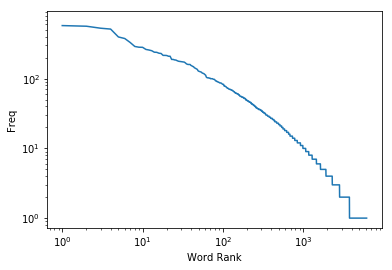

In [37]:
sorted_word_counts = sorted(word_counter.values(), reverse=True)

plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

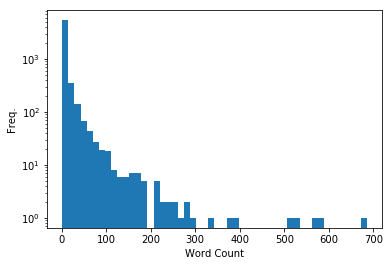

In [38]:
plt.hist(sorted_word_counts, bins=50, log=True);
plt.xlabel('Word Count')
plt.ylabel('Freq.')

The histogram shows the words that have very high word count (for example "elinor" appares ~600 times or "marianne" about ~500) are a few.

## Sentiment Analysis

In [39]:
from textblob import TextBlob

In [40]:
corpus_sentences = nltk.tokenize.sent_tokenize(corpus_text)

In [41]:
print len(corpus_sentences)
print corpus_sentences[:3]

4833
[u'[Sense and Sensibility by Jane Austen 1811]\n\nCHAPTER 1\n\n\nThe family of Dashwood had long been settled in Sussex.', u'Their estate was large, and their residence was at Norland Park,\nin the centre of their property, where, for many generations,\nthey had lived in so respectable a manner as to engage\nthe general good opinion of their surrounding acquaintance.', u'The late owner of this estate was a single man, who lived\nto a very advanced age, and who for many years of his life,\nhad a constant companion and housekeeper in his sister.']


In [42]:
blob = TextBlob(corpus_text)

In [43]:
corpus_sentiment = [sentence.sentiment.polarity for sentence in blob.sentences]

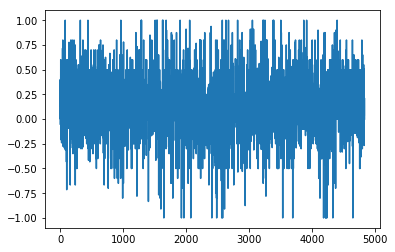

In [44]:
plt.plot(corpus_sentiment)

### Train a classifier for sentiment analysis

If we have a training dataset with target labels for sentiment analysis, we can train a classifier to predict the sentiment in a test dataset. For example, we can download and import the dataset `movie_reviews`: 

In [45]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/sahar/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [46]:
from nltk.corpus import movie_reviews

The `fileids` method provided by all the datasets in `nltk.corpus` gives access to a list of all the files available.

In particular in the movie_reviews dataset we have 2000 text files, each of them is a review of a movie, and they are already split in a `neg` folder for the negative reviews and a `pos` folder for the positive reviews:

In [47]:
len(movie_reviews.fileids())

2000

In [48]:
movie_reviews.fileids()[:3]

[u'neg/cv000_29416.txt', u'neg/cv001_19502.txt', u'neg/cv002_17424.txt']

In [49]:
movie_reviews.fileids()[-3:]

[u'pos/cv997_5046.txt', u'pos/cv998_14111.txt', u'pos/cv999_13106.txt']

`fileids` can also filter the available files based on their category, which is the name of the subfolders they are located in. Therefore we can have lists of positive and negative reviews separately.

In [50]:
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [51]:
len(negative_fileids), len(positive_fileids)

(1000, 1000)

In [52]:
print movie_reviews.raw(fileids=negative_fileids[0])[:1000]

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , have no id

In [53]:
print movie_reviews.raw(fileids=positive_fileids[0])[:1000]

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

The simplest model for analyzing text is just to think about text as an unordered collection of words (bag-of-words). This can generally allow to infer from the text the category, the topic or the sentiment.

From the bag-of-words model we can build features to be used by a classifier, here we assume that each word is a feature that can either be `True` or `False`.
We implement this in Python as a dictionary where for each word in a sentence we associate `True`, if a word is missing, that would be the same as assigning `False`.

In [57]:
useless_words = stopwords + list(string.punctuation)

In [58]:
def bag_of_words_features(words):
    return {
        word:1 for word in words \
        if not word in useless_words}

In [59]:
negative_features = [(bag_of_words_features(movie_reviews.words(fileids=f)), 'neg') for f in negative_fileids]

In [60]:
print negative_features[0]

({u'concept': 1, u'skip': 1, u'insight': 1, u'playing': 1, u'executed': 1, u'go': 1, u'still': 1, u'find': 1, u'seemed': 1, u'write': 1, u'touches': 1, u'thrilling': 1, u'craziness': 1, u'somewhere': 1, u'excites': 1, u'seems': 1, u'snag': 1, u'presents': 1, u'going': 1, u'4': 1, u'pretty': 1, u'joblo': 1, u'folks': 1, u'8': 1, u'main': 1, u'might': 1, u'good': 1, u'7': 1, u'get': 1, u'big': 1, u'showing': 1, u'continues': 1, u'watch': 1, u'break': 1, u'feels': 1, u'every': 1, u'know': 1, u'half': 1, u'world': 1, u'bit': 1, u'password': 1, u'exact': 1, u'dreams': 1, u'cool': 1, u'entire': 1, u'like': 1, u'lost': 1, u'always': 1, u'dig': 1, u'wrapped': 1, u'audience': 1, u'arrow': 1, u'meantime': 1, u'rarely': 1, u'giving': 1, u'looooot': 1, u'mean': 1, u'flick': 1, u'neighborhood': 1, u'deal': 1, u'people': 1, u'generation': 1, u'crow': 1, u'idea': 1, u'dead': 1, u'engaging': 1, u'see': 1, u'decided': 1, u'video': 1, u'wes': 1, u'critique': 1, u'happen': 1, u'guess': 1, u'really': 1, u

In [61]:
positive_features = [(bag_of_words_features(movie_reviews.words(fileids=f)), 'pos') for f in positive_fileids]

In [62]:
print positive_features[0]

({u'childs': 1, u'steve': 1, u'surgical': 1, u'go': 1, u'certainly': 1, u'watchmen': 1, u'song': 1, u'simpsons': 1, u'novel': 1, u'jack': 1, u'surgeon': 1, u'level': 1, u'turns': 1, u'michael': 1, u'flashy': 1, u'sooty': 1, u'direct': 1, u'past': 1, u'street': 1, u'design': 1, u'befriends': 1, u'odd': 1, u'even': 1, u'new': 1, u'supporting': 1, u'never': 1, u'quell': 1, u'les': 1, u'102': 1, u'strong': 1, u'great': 1, u'kids': 1, u'30': 1, u'creepy': 1, u'rafael': 1, u'named': 1, u'love': 1, u'brought': 1, u'color': 1, u'ians': 1, u'would': 1, u'indians': 1, u'chooses': 1, u'music': 1, u'films': 1, u'oscar': 1, u'holm': 1, u'arthouse': 1, u'keeping': 1, u'graphic': 1, u'word': 1, u'car': 1, u'era': 1, u'crazy': 1, u'coltrane': 1, u'carrot': 1, u'sense': 1, u'needs': 1, u'end': 1, u'holds': 1, u'copious': 1, u'worry': 1, u'pales': 1, u'screenwriters': 1, u'tries': 1, u'mad': 1, u'1888': 1, u'filthy': 1, u'bleak': 1, u'attempt': 1, u'cloaking': 1, u'imagining': 1, u'acts': 1, u'finalized

In [63]:
from nltk.classify import NaiveBayesClassifier

One of the simplest supervised machine learning classifiers is the Naive Bayes Classifier, it can be trained on 80% of the data to learn what words are generally associated with positive or with negative reviews.

In [64]:
split = 800
training_set = positive_features[:split] + negative_features[:split]
test_set =  positive_features[split:] + negative_features[split:] 

In [65]:
sentiment_classifier = NaiveBayesClassifier.train(training_set)

We can check after training what is the accuracy on the training set:

In [66]:
nltk.classify.util.accuracy(sentiment_classifier, training_set) * 100

98.0625

Check the classifier accuracy on the test set:

In [67]:
nltk.classify.util.accuracy(sentiment_classifier, test_set) * 100

71.75

In [68]:
sentiment_classifier.show_most_informative_features()

Most Informative Features
             outstanding = 1                 pos : neg    =     13.9 : 1.0
               insulting = 1                 neg : pos    =     13.7 : 1.0
              vulnerable = 1                 pos : neg    =     13.0 : 1.0
               ludicrous = 1                 neg : pos    =     12.6 : 1.0
             uninvolving = 1                 neg : pos    =     12.3 : 1.0
                  avoids = 1                 pos : neg    =     11.7 : 1.0
              astounding = 1                 pos : neg    =     11.7 : 1.0
             fascination = 1                 pos : neg    =     11.0 : 1.0
               animators = 1                 pos : neg    =     10.3 : 1.0
                  darker = 1                 pos : neg    =     10.3 : 1.0


What this tells you is the ratio of occurences in negative to positive, or visa versa, for every word. So here, we can see that the term "outstanding" appears 13.9 more times as often in positive reviews as it does in negative reviews. 